In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_por = pd.read_csv("student-por.csv",sep=';')

In [3]:
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [4]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
school        649 non-null object
sex           649 non-null object
age           649 non-null int64
address       649 non-null object
famsize       649 non-null object
Pstatus       649 non-null object
Medu          649 non-null int64
Fedu          649 non-null int64
Mjob          649 non-null object
Fjob          649 non-null object
reason        649 non-null object
guardian      649 non-null object
traveltime    649 non-null int64
studytime     649 non-null int64
failures      649 non-null int64
schoolsup     649 non-null object
famsup        649 non-null object
paid          649 non-null object
activities    649 non-null object
nursery       649 non-null object
higher        649 non-null object
internet      649 non-null object
romantic      649 non-null object
famrel        649 non-null int64
freetime      649 non-null int64
goout         649 non-null int64
Dalc          649 no

In [5]:
def age(age):
    new_age=[]
    for i in age:
        if(i < 17):
            i=0
        elif (i < 19):
            i=1
        else:
            i=2
        new_age.append(i)
    return new_age

In [7]:
df_por['age']=age(df_por['age'])

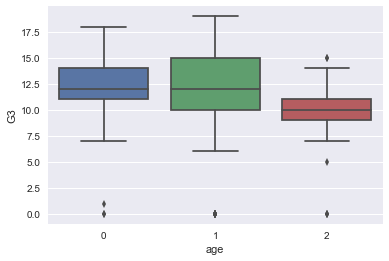

In [8]:
sns.boxplot(x='age',y='G3',data=df_por)

Students of age (19-20) mostly have a score around 10.0

In [9]:
df_por['school']=pd.get_dummies(df_por['school'],drop_first=True)

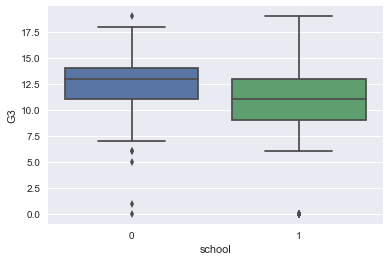

In [11]:
sns.boxplot(x='school',y='G3',data=df_por)      # 0 = GP and 1 = MS

Students at GP perform better than students at MS

In [14]:
df_por['sex'].value_counts()

F    383
M    266
Name: sex, dtype: int64

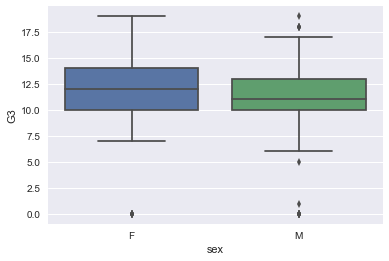

In [15]:
sns.boxplot(x='sex',y='G3',data=df_por)

Female students have better performance in school than the male students. 
Since the mean score of girls is more than boys and the maximum marks also.(Though there are some outliers)

In [16]:
df_por['sex'] = pd.get_dummies(df_por['sex'],drop_first=True)

In [17]:
df_por['address'].value_counts()

U    452
R    197
Name: address, dtype: int64

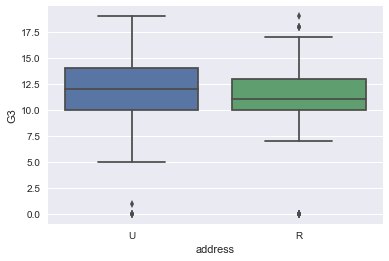

In [18]:
sns.boxplot('address','G3',data=df_por)

Urban students are distriuted widely in terms of scores,  whereas rural students are clustered between 7 and 17

In [19]:
df_por['address'] = pd.get_dummies(df_por['address'],drop_first=True)

In [20]:
df['famsize'].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

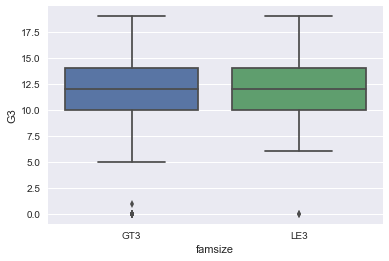

In [21]:
sns.boxplot('famsize','G3',data=df_por)

Since the family size of the students doesn't tell much about their scores, we'll drop this attribute.

In [22]:
df_por.drop('famsize',axis=1,inplace=True)

In [23]:
df_por['Pstatus'].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

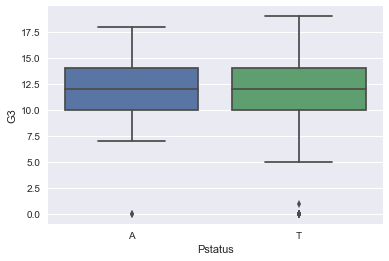

In [24]:
sns.boxplot(x='Pstatus',y='G3',data=df_por)

Parent's status of living together or apart also affect much the scores, so we'll drop this.

In [25]:
df_por.drop('Pstatus',axis=1,inplace=True)

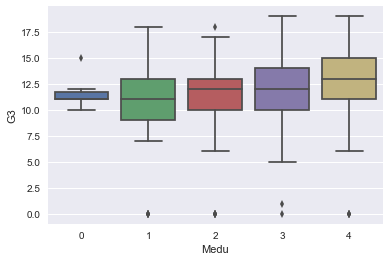

In [26]:
sns.boxplot(x='Medu',y='G3',data=df_por)

Students whose mother have completed higher education tend to score more than others

In [27]:
df_por['Fedu'].value_counts()

2    209
1    174
3    131
4    128
0      7
Name: Fedu, dtype: int64

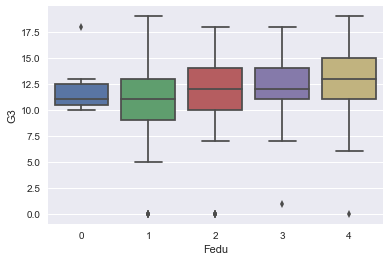

In [119]:
sns.boxplot(x='Fedu',y='G3',data=df_por)

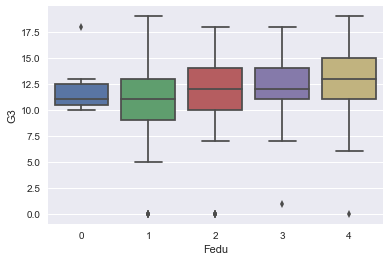

In [28]:
sns.boxplot(x='Fedu',y='G3',data=df_por)

Students whose fathers have completed higher education have slightly better chance of performing well in exams.

In [29]:
df_por['Mjob'].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

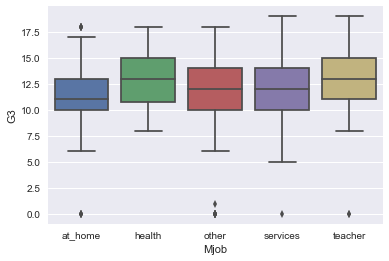

In [30]:
sns.boxplot(x='Mjob',y='G3',data=df_por)

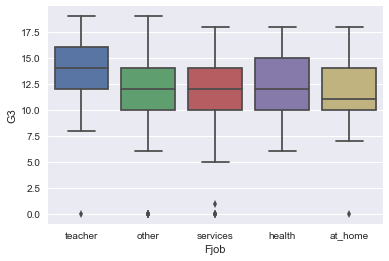

In [31]:
sns.boxplot(x='Fjob',y='G3',data=df_por)

Students whose parents are teachers ,score better in exams.

I will convert these categories into dummy variables later

In [32]:
df_por['reason'].value_counts()

course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

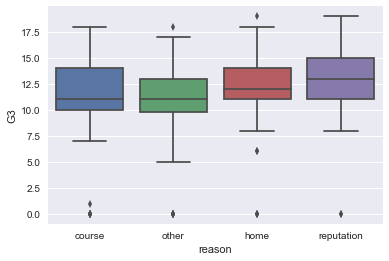

In [33]:
sns.boxplot('reason','G3',data=df_por)

Students who choose their school by looking at it's reputation ,tend to score better

In [34]:
df_por['guardian'].value_counts()

mother    455
father    153
other      41
Name: guardian, dtype: int64

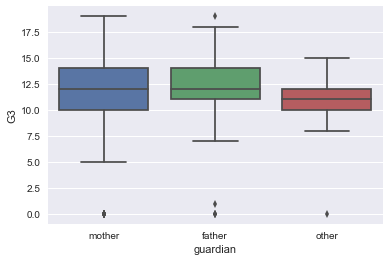

In [35]:
sns.boxplot(x='guardian',y='G3',data=df_por)

student with guardian's other than father or mother ,scored less than remaining.

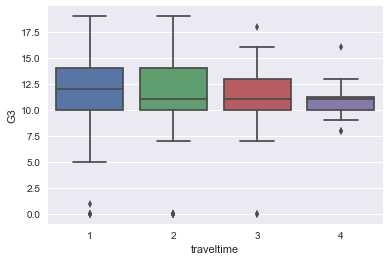

In [36]:
sns.boxplot(x='traveltime',y='G3',data=df_por)

Travel time to school doesn't affect much

In [37]:
df_por.drop('traveltime',axis=1,inplace=True)

In [38]:
df_por['studytime'].value_counts()

2    305
1    212
3     97
4     35
Name: studytime, dtype: int64

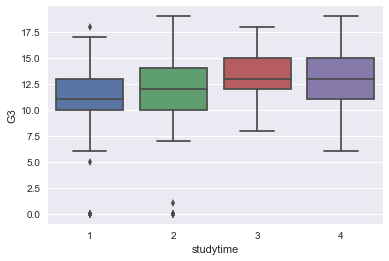

In [39]:
sns.boxplot(x='studytime',y='G3',data=df_por)

It's pretty clear that if you study for more time,your result will improve.
But we see a little downfall in students who study more than 10 hours , maybe because they are not resting.

In [40]:
df_por['failures'].value_counts()

0    549
1     70
2     16
3     14
Name: failures, dtype: int64

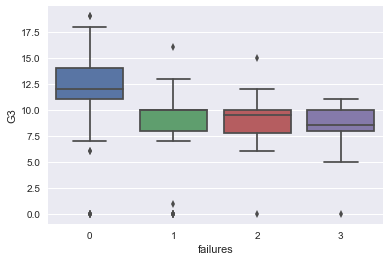

In [41]:
sns.boxplot(x='failures',y='G3',data=df_por)

Student's who do not have any past failures record score more. 

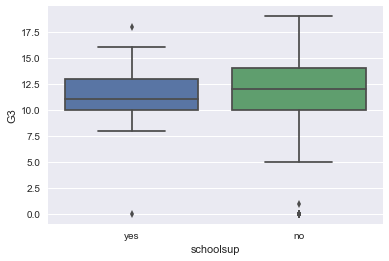

In [42]:
sns.boxplot('schoolsup','G3',data=df_por)

Student's with school support have much higher chance of passing the exam.

In [43]:
df_por['schoolsup']=pd.get_dummies(df_por['schoolsup'],drop_first=True)

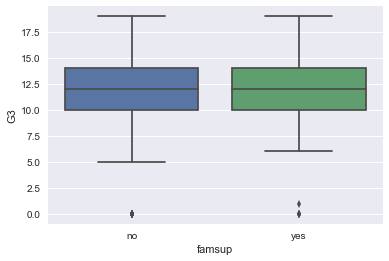

In [44]:
sns.boxplot('famsup','G3',data=df_por)

Suprisingly there's almost no difference in student's grades whether their family supports them or not in education.

In [45]:
df_por.drop('famsup',axis=1,inplace=True)

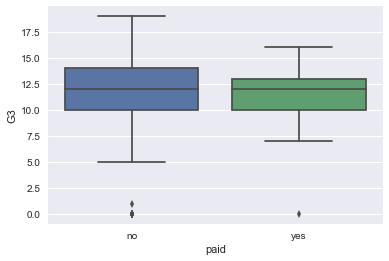

In [46]:
sns.boxplot('paid','G3',data=df_por)

In [47]:
df_por['paid'].value_counts()

no     610
yes     39
Name: paid, dtype: int64

Since there are very less student's who are going to paid classes, there's a chance of overfitting our model.
So we'll drop this.

In [48]:
df_por.drop('paid',axis=1,inplace=True)

In [49]:
df_por['activities'].value_counts()

no     334
yes    315
Name: activities, dtype: int64

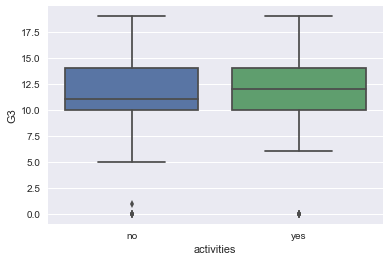

In [50]:
sns.boxplot('activities','G3',data=df_por)

In [51]:
df_por.drop('activities',axis=1,inplace=True)

In [52]:
df_por['nursery'].value_counts()

yes    521
no     128
Name: nursery, dtype: int64

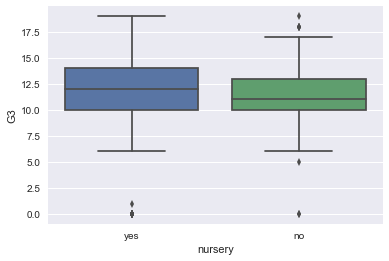

In [53]:
sns.boxplot('nursery','G3',data=df_por)

Since there's not much difference in scores.
We'll drop this also.

In [54]:
df_por.drop('nursery',axis=1,inplace=True)

In [55]:
df_por['higher'].value_counts()

yes    580
no      69
Name: higher, dtype: int64

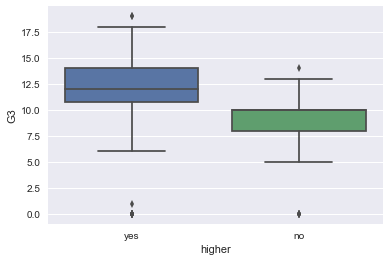

In [56]:
sns.boxplot('higher','G3',data=df_por)

The students who don't want to take higher studies ,have a poor performance .

In [57]:
df_por['higher']=pd.get_dummies(df_por['higher'],drop_first=True)

In [58]:
df_por['internet'].value_counts()

yes    498
no     151
Name: internet, dtype: int64

In [59]:
df_por['internet']=pd.get_dummies(df_por['internet'],drop_first=True)

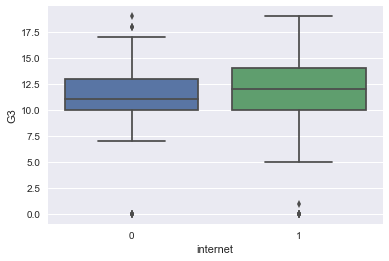

In [60]:
sns.boxplot(x='internet',y='G3',data=df_por)

Students who do not have internet access at home tend to score average marks. 

In [61]:
df_por['romantic'].value_counts()

no     410
yes    239
Name: romantic, dtype: int64

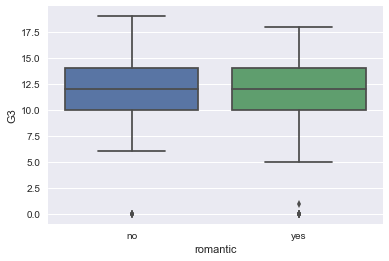

In [62]:
sns.boxplot('romantic','G3',data=df_por)

We cannot see much difference in student's performance based on whether they are in relationship or not

In [63]:
df_por.drop('romantic',axis=1,inplace=True)

In [64]:
df_por['famrel'].value_counts()

4    317
5    180
3    101
2     29
1     22
Name: famrel, dtype: int64

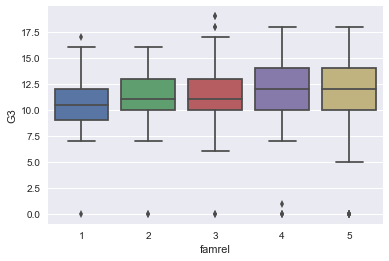

In [65]:
sns.boxplot('famrel','G3',data=df_por)

Family relations is not affecting the student's performance much.

In [66]:
df_por.drop('famrel',axis=1,inplace=True)

In [67]:
df_por['freetime'].value_counts()

3    251
4    178
2    107
5     68
1     45
Name: freetime, dtype: int64

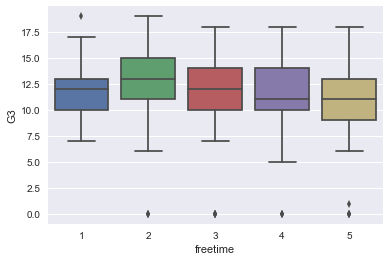

In [68]:
sns.boxplot('freetime','G3',data=df_por)

In [69]:
df_por.drop('freetime',axis=1,inplace=True)

In [70]:
df_por['goout'].value_counts()

3    205
2    145
4    141
5    110
1     48
Name: goout, dtype: int64

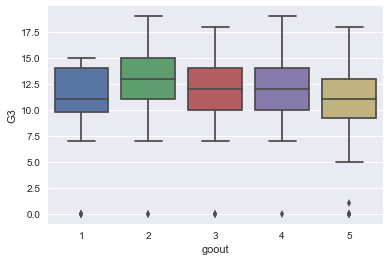

In [71]:
sns.boxplot('goout','G3',data=df_por)

Going out with friends doesn't affect the performance much , but the student's go out very frequently ,tend to score less marks.

In [72]:
df_por['Dalc'].value_counts()

1    451
2    121
3     43
5     17
4     17
Name: Dalc, dtype: int64

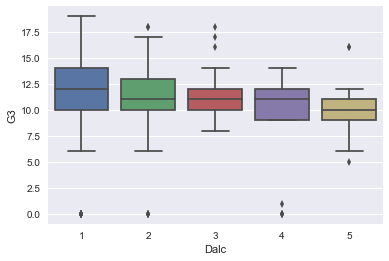

In [73]:
sns.boxplot('Dalc','G3',data=df_por)

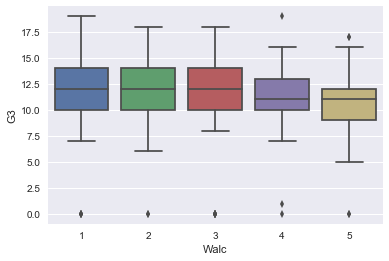

In [74]:
sns.boxplot('Walc','G3',data=df_por)

Student's who consume alcohol in low quantity ,scores better.

In [75]:
df_por['health'].value_counts()

5    249
3    124
4    108
1     90
2     78
Name: health, dtype: int64

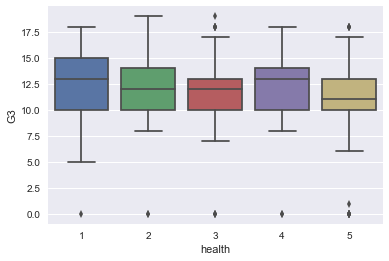

In [76]:
sns.boxplot('health','G3',data=df_por)

There's not much difference in the scores with respect to student's health

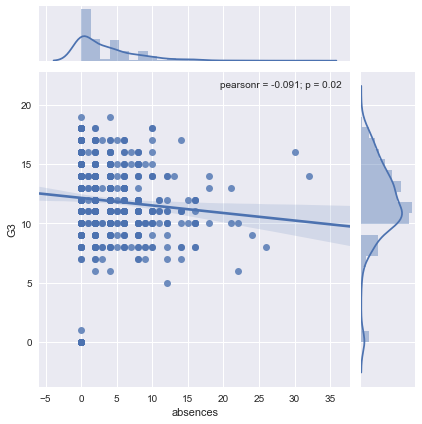

In [77]:
sns.jointplot(x='absences',y='G3',data=df_por,kind="reg")

In [78]:
def absences(n):
    new=[]
    for i in n:    
        if (i <= 10):
            i=0
        elif(i <= 20):
            i=1
        else:
            i=2
        new.append(i)
    return new

In [79]:
df_por['absences']=absences(df_por['absences'])

In [80]:
df_por['absences'].value_counts()

0    600
1     41
2      8
Name: absences, dtype: int64

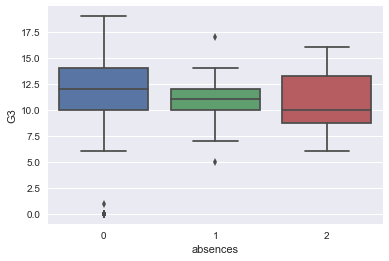

In [81]:
sns.boxplot('absences','G3',data=df_por)

With increase in absences , the performance of the students decrease

In [82]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 23 columns):
school       649 non-null uint8
sex          649 non-null uint8
age          649 non-null int64
address      649 non-null uint8
Medu         649 non-null int64
Fedu         649 non-null int64
Mjob         649 non-null object
Fjob         649 non-null object
reason       649 non-null object
guardian     649 non-null object
studytime    649 non-null int64
failures     649 non-null int64
schoolsup    649 non-null uint8
higher       649 non-null uint8
internet     649 non-null uint8
goout        649 non-null int64
Dalc         649 non-null int64
Walc         649 non-null int64
health       649 non-null int64
absences     649 non-null int64
G1           649 non-null int64
G2           649 non-null int64
G3           649 non-null int64
dtypes: int64(13), object(4), uint8(6)
memory usage: 90.1+ KB


In [92]:
df_por = pd.get_dummies(df_por,drop_first=True)

In [93]:
df_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 32 columns):
school               649 non-null uint8
sex                  649 non-null uint8
age                  649 non-null int64
address              649 non-null uint8
Medu                 649 non-null int64
Fedu                 649 non-null int64
studytime            649 non-null int64
failures             649 non-null int64
schoolsup            649 non-null uint8
higher               649 non-null uint8
internet             649 non-null uint8
goout                649 non-null int64
Dalc                 649 non-null int64
Walc                 649 non-null int64
health               649 non-null int64
absences             649 non-null int64
G1                   649 non-null int64
G2                   649 non-null int64
G3                   649 non-null int64
Mjob_health          649 non-null uint8
Mjob_other           649 non-null uint8
Mjob_services        649 non-null uint8
Mjob_teacher   

In [120]:
from sklearn.model_selection import train_test_split

In [122]:
def result(score):
    new=[]
    for i in score:
        if (i<8):
            i=0     #Student fails
        else:
            i=1     #student passes
        new.append(i)
    return new

In [123]:
df_por['G3']=result(df_por['G3'])

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df_por.drop(['G1','G2','G3'],axis=1), df_por['G3'], test_size=0.33, random_state=42)

In [126]:
from sklearn.linear_model import LogisticRegression

In [127]:
model = LogisticRegression()

In [128]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [129]:
model.score(X_test,y_test)

0.95348837209302328